In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
case = "manyR"
#case = "R0manyD"
#case = "R1manyD"

cosine = True

#Rs = [0, 1, 3, 10, 30, 100, 300, 1_000, 3_000]
SERVER_ROUNDS = 20
suffix_str = ""
if cosine:
    # Kappas for cosine similarity
    # kappas = np.round(np.concatenate((np.arange(0,0.3, 0.02), np.arange(0.3, 1, 0.1))),3)   
    cosine_str = '_cosine'
else:
    # Kappas for Euclidean distance
    # kappas = np.round(np.concatenate((np.arange(0, 1, 0.2), np.arange(1,10,1), np.arange(10,55,5))),3)
    cosine_str = ''

result_dir = "/home/salesort/Documents/644_CMPUT/res_analysis"

if case == "manyR":
    title = "Multiple mislabeled samples, balanced data"
    var_label = var = "R"
    n_case = 1 + int(cosine)
elif case == "R0manyD":
    title = "No mislabeled samples, unbalanced data"
    var = "D"
    n_case = 3 + int(cosine)
elif case == "R1manyD":
    title = "One mislabeled sample, unbalanced data"
    var = "D"
    var_label = "Dominant Proportion"
    n_case = 5 + int(cosine)
    
if cosine:
    title += " (Cosine dissimilarity)"
else:
    title += " (Euclidean distance)"

df_handle = f"df_{case}{cosine_str}{suffix_str}.csv"
print(f"{n_case=}")
print(df_handle)

n_case=2
df_manyR_cosine.csv


In [3]:
#Rs = [0, 1, 3, 10, 30, 100, 300, 1_000, 3_000]
df_classifier = pd.read_csv(f'/home/salesort/Documents/644_CMPUT/res_analysis/{df_handle}')
#df_classifier = pd.read_csv(f'/home/salesort/Documents/644_CMPUT/res_analysis/df_classifier_R.csv')

In [4]:
#df_classifier.head(200)

In [5]:
kappas = df_classifier["kappa"].unique()
Rs = df_classifier["R"].unique()
Ds = df_classifier["D"].unique()

In [6]:
#df_classifier["Recall"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FN"]) # TP/(TP+FN)
#df_classifier["Precision"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FP"]) # TP/(TP+FP)
#df_classifier["TPR"] = df_classifier["TP"]/(df_classifier["TP"] + df_classifier["FN"]) # TP/(TP+FN)
#df_classifier["FPR"] = df_classifier["FP"]/(df_classifier["FP"] + df_classifier["TN"]) # FP/(FP+TN)
## Accuracy = (TP+TN)/(TP+TN+FP+FN)
#df_classifier["F1"] = 2*df_classifier["TP"]/(2*df_classifier["TP"]+df_classifier["FP"]+df_classifier["FN"])# F1 = 2*TP / (2*TP+FP+FN)

In [7]:
df_classifier.describe()

,R,D,kappa,accu,TN,FN,TP,FP,Recall,Precision,TPR,FPR,F1
count,198.000000,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,176.000000,82.000000,176.000000,198.000000,178.000000
mean,493.777778,1.000000e-01,0.286364,0.896944,173.646465,12.035354,5.742424,8.575758,0.323011,0.863013,0.323011,0.047068,0.306277
std,939.668789,1.391297e-17,0.253074,0.181631,38.510942,8.964893,8.143343,38.035541,0.418291,0.302184,0.418291,0.208602,0.398716
min,0.000000,1.000000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000e-01,0.100000,0.900000,180.000000,0.000000,0.000000,0.000000,0.000000,0.952381,0.000000,0.000000,0.000000
50%,30.000000,1.000000e-01,0.210000,0.900000,180.000000,18.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,300.000000,1.000000e-01,0.400000,0.978750,180.000000,20.000000,13.000000,0.000000,0.750000,1.000000,0.750000,0.000000,0.750000
max,3000.000000,1.000000e-01,0.900000,1.000000,200.000000,20.000000,20.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000


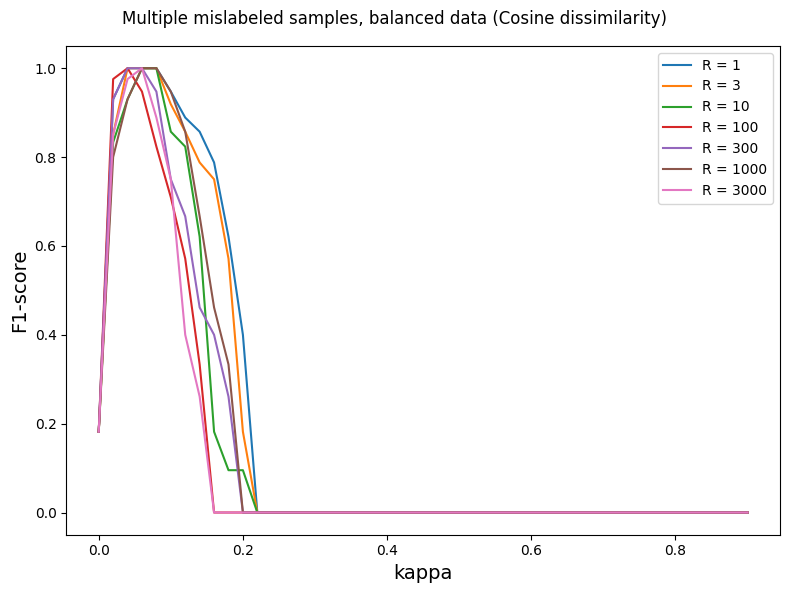

In [8]:
fig1 = plt.figure(figsize=(8,6)) 
ax1 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(2,1,2)

if var == "R":
    var_vals = [1, 3, 10, 100, 300, 1000, 3000]
else:
    var_vals = [0.1, 0.5, 0.75, 0.9, 0.99]
    

for var_val in var_vals:
    f1_r = df_classifier[df_classifier[var] == var_val]["F1"]
    accu = df_classifier[df_classifier[var] == var_val]["accu"]
    ax1.plot(kappas, f1_r, label = f"{var_label} = {var_val}")
    #ax2.plot(kappas, accu, label = f"R = {R}")
ax1.set_xlabel("kappa", fontsize=14)
#ax2.set_xlabel("kappa", fontsize=14)
ax1.set_ylabel("F1-score", fontsize=14)
#ax2.set_ylabel("Accuracy", fontsize=14)
ax1.legend(loc="upper right")
#ax2.legend(loc="upper right")
fig1.suptitle(title)
fig1.tight_layout()
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


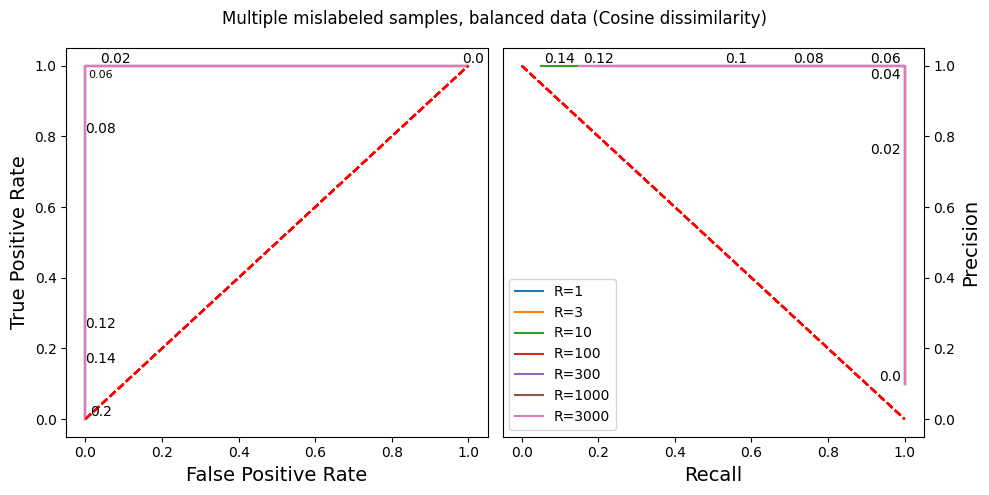

In [9]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

for var_val in var_vals: #Rs
    TPR = df_classifier[df_classifier[var] == var_val]["TPR"]
    FPR = df_classifier[df_classifier[var] == var_val]["FPR"]
    Precision = df_classifier[df_classifier[var] == var_val]["Precision"]
    Recall = df_classifier[df_classifier[var] == var_val]["Recall"]
    ax1.plot(FPR, TPR, label = f"{var_label}={var_val}")
    ax1.plot([0,1],[0,1], color = 'r', ls= '--')
    ax2.plot([0,1],[1,0], color = 'r', ls= '--')
    ax2.plot(Recall, Precision, label = f"{var_label}={var_val}")
    ax1.set_xlim([-0.05, 1.05])
    ax1.set_ylim([-0.05, 1.05])
    ax2.set_xlim([-0.05, 1.05])
    ax2.set_ylim([-0.05, 1.05])
    ax1.set_xlabel("False Positive Rate", fontsize=14)
    ax1.set_ylabel("True Positive Rate", fontsize=14)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_xlabel("Recall", fontsize=14)
    ax2.set_ylabel("Precision", fontsize=14)
for i, (i_TPR, i_FPR, i_Precision, i_Recall) in enumerate(zip(TPR, FPR, Precision, Recall)):
    if i in [0]: 
        ax1.text(i_FPR+0.04, i_TPR, kappas[i], horizontalalignment='right', verticalalignment='bottom')
        
    if (n_case == 1 and i in [1, 2, 3, 5, 6, 8, 15, 16]) or\
       (n_case == 2 and i in [1, 4, 6, 7, 10]) or\
       (n_case == 5 and i in [3, 5, 6, 8, 10, 11, 12, 13, 15, 16, 18, 20]) or\
       (n_case == 6 and i in [2,3,4,5,6,7,11, 13, 15, 20]):
        ax1.text(i_FPR+0.04, i_TPR, kappas[i], horizontalalignment='center', verticalalignment='bottom')
        
    if (n_case == 1 and i in [14]) or\
       (n_case == 2 and i in [3]) or\
       (n_case == 5 and i in []) or\
       (n_case == 6 and i in []):
        ax1.text(i_FPR+0.04, i_TPR-0.04, kappas[i], horizontalalignment='center', verticalalignment='bottom', fontsize=8)
        
    if (n_case == 1 and i in [0, 2, 3, 4, 5, 6, 7, 14, 15,]) or\
       (n_case == 2 and i in [0,1, 2, 3, 4, 5, 6, 7, 14, 16,]) or\
       (n_case == 5 and i in [0, 5, 6, 7, 8,9,10, 11, 12, 14,  15, 17, 18]) or\
       (n_case == 6 and i in [0, 1,2,3,4,5, 6, 10, 12, 14,    18]):
        ax2.text(i_Recall-0.01, i_Precision, kappas[i], horizontalalignment='right', verticalalignment='bottom')
ax2.legend(loc=("lower left"))
fig1.suptitle(title)
fig1.tight_layout()

In [10]:
df_classifier[df_classifier["R"] == 300].head(200).reset_index(drop=True)

,R,D,kappa,accu,TN,FN,TP,FP,Recall,Precision,TPR,FPR,F1
0,300,0.1,0.00,0.100,0,0,20,180,1.00,0.100000,1.00,1.000000,0.181818
1,300,0.1,0.02,0.985,177,0,20,3,1.00,0.869565,1.00,0.016667,0.930233
2,300,0.1,0.04,1.000,180,0,20,0,1.00,1.000000,1.00,0.000000,1.000000
3,300,0.1,0.06,1.000,180,0,20,0,1.00,1.000000,1.00,0.000000,1.000000
4,300,0.1,0.08,0.990,180,2,18,0,0.90,1.000000,0.90,0.000000,0.947368
5,300,0.1,0.10,0.960,180,8,12,0,0.60,1.000000,0.60,0.000000,0.750000
6,300,0.1,0.12,0.950,180,10,10,0,0.50,1.000000,0.50,0.000000,0.666667
7,300,0.1,0.14,0.930,180,14,6,0,0.30,1.000000,0.30,0.000000,0.461538
8,300,0.1,0.16,0.925,180,15,5,0,0.25,1.000000,0.25,0.000000,0.400000
9,300,0.1,0.18,0.915,180,17,3,0,0.15,1.000000,0.15,0.000000,0.260870


In [11]:
from multiprocessing import Pool

In [12]:
def fn(a,  c=False, b=2):
    if c:
        return a + b
    else:
        return a*b

In [13]:
a = [1,2,3]
b = [3,3,3]
c = [False, False, False]
with Pool(5) as p:
    res = p.starmap(fn, zip(a,b,c))
print(res)

[1, 2, 3]


In [14]:
[]

[]

In [15]:
list(np.array([[i]*2 for i in range(5)]).flatten())

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]